In [127]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [57]:
profile_4 = norm(loc=4.4,scale=7.7)
profile_5 = norm(loc=5.4,scale=11)
profile_6 = norm(loc=6.3,scale=13.9)

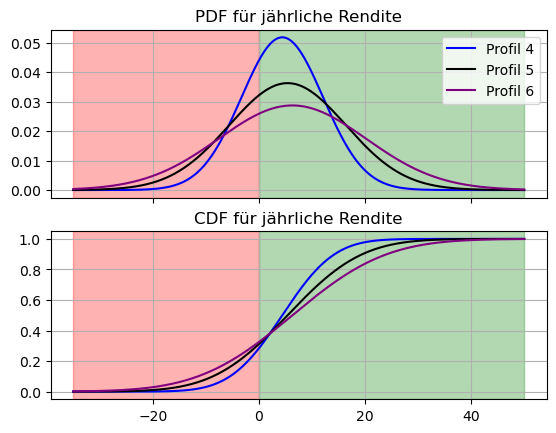

In [74]:
x=np.linspace(-35,50,1000)

fig, axs = plt.subplots(2,1, sharex=True)
ax = axs[0]
ax.axvspan(-35, 0, alpha=0.3, color='red')
ax.axvspan(0, 50, alpha=0.3, color='green')
ax.plot(x, profile_4.pdf(x), color='blue', ls='-', label='Profil 4')
ax.plot(x, profile_5.pdf(x), color='black', ls='-', label='Profil 5')
ax.plot(x, profile_6.pdf(x), color='purple', ls='-', label='Profil 6')
ax.legend(loc="best")
ax.grid(True)
ax.set_title("PDF für jährliche Rendite")

ax = axs[1]
ax.axvspan(-35, 0, alpha=0.3, color='red')
ax.axvspan(0, 50, alpha=0.3, color='green')
ax.plot(x, profile_4.cdf(x), color='blue', ls='-', label='Profil 4')
ax.plot(x, profile_5.cdf(x), color='black', ls='-', label='Profil 5')
ax.plot(x, profile_6.cdf(x), color='purple', ls='-', label='Profil 6')
ax.grid(True)
ax.set_title("CDF für jährliche Rendite")
plt.show()

Verlustwahrscheinlichkeit bei Profil 4: 28.4%
Verlustwahrscheinlichkeit bei Profil 5: 31.2%
Verlustwahrscheinlichkeit bei Profil 6: 32.5%


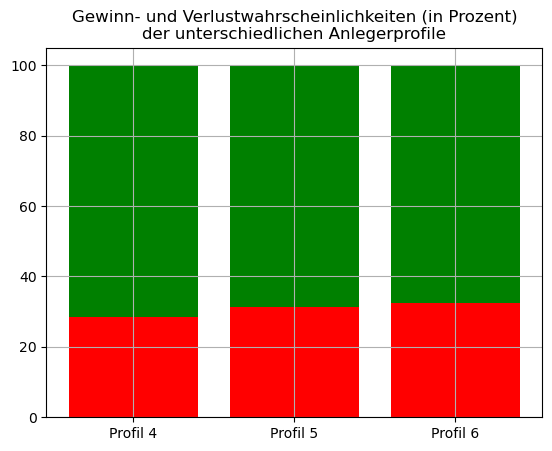

In [126]:
p_loss_4 = 100*np.round(profile_4.cdf(0),3)
p_loss_5 = 100*np.round(profile_5.cdf(0),3)
p_loss_6 = 100*np.round(profile_6.cdf(0),3)

print(f"Verlustwahrscheinlichkeit bei Profil 4: {p_loss_4}%")
print(f"Verlustwahrscheinlichkeit bei Profil 5: {p_loss_5}%")
print(f"Verlustwahrscheinlichkeit bei Profil 6: {p_loss_6}%")

fig, ax = plt.subplots()
ax.grid(True)
ax.bar([0,1,2], height=[p_loss_4, p_loss_5, p_loss_6], facecolor="red", bottom=[0,0,0])
ax.bar([0,1,2], height=[100-p_loss_4,100-p_loss_5,100-p_loss_6], facecolor="green", bottom=[p_loss_4, p_loss_5, p_loss_6])
ax.set_xticks([0,1,2])
ax.set_xticklabels(["Profil 4", "Profil 5", "Profil 6"])

ax.set_title("Gewinn- und Verlustwahrscheinlichkeiten (in Prozent)\nder unterschiedlichen Anlegerprofile")
plt.show()

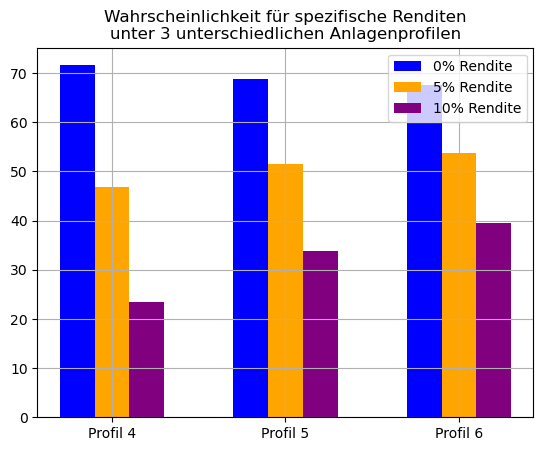

In [139]:
def p_win(profile, ret):
    if profile == 4:
        return 100*np.round(profile_4.sf(ret),3)
    elif profile == 5:
        return 100*np.round(profile_5.sf(ret),3)
    elif profile == 6:
        return 100*np.round(profile_6.sf(ret),3)
    else:
        pass

fig, ax = plt.subplots()
ax.grid(True)
offset=-0.2
ax.bar([0+offset,1+offset,2+offset], height=[p_win(p,0) for p in [4,5,6]], width=0.2,facecolor="blue", label="0% Rendite")

offset=0
ax.bar([0+offset,1+offset,2+offset], height=[p_win(p,5) for p in [4,5,6]], width=0.2,facecolor="orange", label="5% Rendite")

offset=0.2
ax.bar([0+offset,1+offset,2+offset], height=[p_win(p,10) for p in [4,5,6]], width=0.2,facecolor="purple", label="10% Rendite")
ax.set_xticks([0,1,2])
ax.set_xticklabels(["Profil 4", "Profil 5", "Profil 6"])
ax.legend(loc="best")

ax.set_title("Wahrscheinlichkeit für spezifische Renditen\nunter 3 unterschiedlichen Anlagenprofilen")
plt.show()

In [86]:
print(f"Gewinnwahrscheinlichkeit bei Profil 4: {100*np.round(profile_4.sf(6.3),3)}%")
print(f"Gewinnwahrscheinlichkeit bei Profil 5: {100*np.round(profile_5.sf(6.3),3)}%")
print(f"Gewinnwahrscheinlichkeit bei Profil 6: {100*np.round(profile_6.sf(6.3),3)}%")

Gewinnwahrscheinlichkeit bei Profil 4: 40.300000000000004%
Gewinnwahrscheinlichkeit bei Profil 5: 46.7%
Gewinnwahrscheinlichkeit bei Profil 6: 50.0%


1